# Importing Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import warnings

# Load and Explore Data

In [3]:
data = pd.read_csv('osteoporosis.csv')

In [4]:
data.describe()

,Id,Age,Osteoporosis
count,1958.000000,1958.000000,1958.000000
mean,105515.320735,39.101124,0.500000
std,2589.407806,21.355424,0.500128
min,101008.000000,18.000000,0.000000
25%,103348.500000,21.000000,0.000000
50%,105469.000000,32.000000,0.500000
75%,107755.000000,53.000000,1.000000
max,109996.000000,90.000000,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1958 entries, 0 to 1957
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Id                   1958 non-null   int64 
 1   Age                  1958 non-null   int64 
 2   Gender               1958 non-null   object
 3   Hormonal Changes     1958 non-null   object
 4   Family History       1958 non-null   object
 5   Race/Ethnicity       1958 non-null   object
 6   Body Weight          1958 non-null   object
 7   Calcium Intake       1958 non-null   object
 8   Vitamin D Intake     1958 non-null   object
 9   Physical Activity    1958 non-null   object
 10  Smoking              1958 non-null   object
 11  Alcohol Consumption  970 non-null    object
 12  Medical Conditions   1311 non-null   object
 13  Medications          973 non-null    object
 14  Prior Fractures      1958 non-null   object
 15  Osteoporosis         1958 non-null   int64 
dtypes: int

In [6]:
data.isnull().sum()

Id                       0
Age                      0
Gender                   0
Hormonal Changes         0
Family History           0
Race/Ethnicity           0
Body Weight              0
Calcium Intake           0
Vitamin D Intake         0
Physical Activity        0
Smoking                  0
Alcohol Consumption    988
Medical Conditions     647
Medications            985
Prior Fractures          0
Osteoporosis             0
dtype: int64

# Label Encoding for Categorical Features

In [7]:
categorical_cols = data.select_dtypes(include=['object']).columns
le = LabelEncoder()
for col in categorical_cols:
    data[col] = le.fit_transform(data[col])

# Impute Missing Values with Mean

In [8]:
data['Alcohol Consumption'] = data['Alcohol Consumption'].fillna(data['Alcohol Consumption'].mean())
data['Medical Conditions'] = data['Medical Conditions'].fillna(data['Medical Conditions'].mean())
data['Medications'] = data['Medications'].fillna(data['Medications'].mean())


# Splitting Features and Target


In [9]:
X = data.drop(columns=['Osteoporosis', 'Id'])
y = data['Osteoporosis']

In [10]:
X.columns

Index(['Age', 'Gender', 'Hormonal Changes', 'Family History', 'Race/Ethnicity',
       'Body Weight', 'Calcium Intake', 'Vitamin D Intake',
       'Physical Activity', 'Smoking', 'Alcohol Consumption',
       'Medical Conditions', 'Medications', 'Prior Fractures'],
      dtype='object')

# Train-Test Split


In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


# Scaling Features


In [12]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Random Forest Classifier


In [13]:
best_model = RandomForestClassifier(class_weight="balanced",random_state=42,n_estimators = 100,criterion = 'entropy')
best_model.fit(X_train, y_train)


y_pred = best_model.predict(X_test)  
y_proba = best_model.predict_proba(X_test)[:, 1]  

print("accuracy score :",accuracy_score(y_test,y_pred))

print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


accuracy score : 0.8367346938775511
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.96      0.86       196
           1       0.95      0.71      0.81       196

    accuracy                           0.84       392
   macro avg       0.86      0.84      0.83       392
weighted avg       0.86      0.84      0.83       392

Confusion Matrix:
 [[189   7]
 [ 57 139]]


# Decision Tree Classifier


In [14]:
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)


y_pred = model1.predict(X_test)  
y_proba = model1.predict_proba(X_test)[:, 1]  


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy score :",accuracy_score(y_test,y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.80      0.80       196
           1       0.80      0.82      0.81       196

    accuracy                           0.81       392
   macro avg       0.81      0.81      0.81       392
weighted avg       0.81      0.81      0.81       392

Confusion Matrix:
 [[156  40]
 [ 36 160]]
accuracy score : 0.8061224489795918


# Logistic Regression


In [15]:
model2 = LogisticRegression()
model2.fit(X_train, y_train)

y_pred = model2.predict(X_test)  
y_proba = model2.predict_proba(X_test)[:, 1]  

print("accuracy score :",accuracy_score(y_test,y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


accuracy score : 0.8010204081632653
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.88      0.82       196
           1       0.86      0.72      0.78       196

    accuracy                           0.80       392
   macro avg       0.81      0.80      0.80       392
weighted avg       0.81      0.80      0.80       392

Confusion Matrix:
 [[172  24]
 [ 54 142]]


# Support Vector Machine Classifier


In [16]:
model3 = SVC(random_state=42)
model3.fit(X_train, y_train)


y_pred = model3.predict(X_test)  
# y_proba = model3.predict_proba(X_test)[:, 1]  


print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("accuracy score :",accuracy_score(y_test,y_pred))



Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.95      0.84       196
           1       0.94      0.68      0.79       196

    accuracy                           0.82       392
   macro avg       0.84      0.82      0.82       392
weighted avg       0.84      0.82      0.82       392

Confusion Matrix:
 [[187   9]
 [ 62 134]]
accuracy score : 0.8188775510204082


# Plot Confusion Matrix for Random Forest Classifier


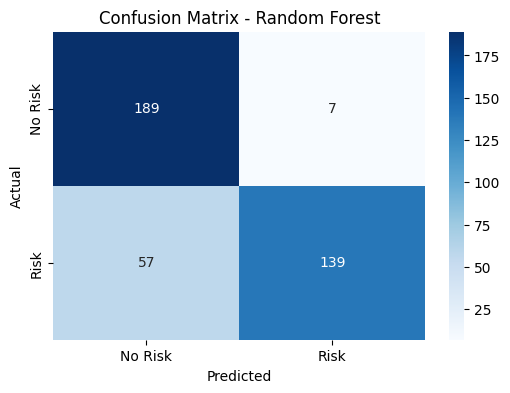

In [17]:
# Train the Random Forest Classifier
best_model = RandomForestClassifier(class_weight="balanced", random_state=42, n_estimators=100, criterion='entropy')
best_model.fit(X_train, y_train)

# Predictions and probability
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['No Risk', 'Risk'], yticklabels=['No Risk', 'Risk'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix - Random Forest')
plt.show()


# Feature Importance - Random Forest Classifier


Feature Importance for Random Forest Classifier:
                Feature  Importance
0                   Age    0.610672
4        Race/Ethnicity    0.046396
11   Medical Conditions    0.045113
12          Medications    0.028740
10  Alcohol Consumption    0.028625
13      Prior Fractures    0.028249
9               Smoking    0.027728
3        Family History    0.027703
2      Hormonal Changes    0.027364
7      Vitamin D Intake    0.026725
1                Gender    0.026567
6        Calcium Intake    0.025831
8     Physical Activity    0.025238
5           Body Weight    0.025049


C:\Users\Jenish\AppData\Local\Temp\ipykernel_23144\2896585687.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')


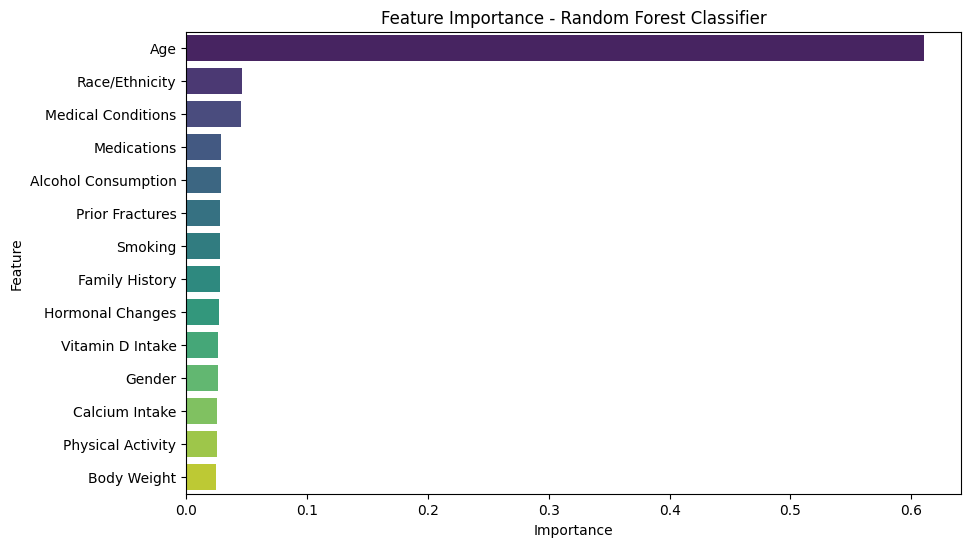

In [18]:
feature_importances = best_model.feature_importances_
features = X.columns

# Creating a DataFrame for feature importance
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Display feature importance
print("Feature Importance for Random Forest Classifier:")
print(feature_importance_df)

# Visualizing feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title("Feature Importance - Random Forest Classifier")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()


In [19]:
import joblib
joblib.dump(best_model, 'best_model.joblib')
joblib.dump(scaler,'scaler.joblib')

['scaler.joblib']